# On Multiple Linear Regression - Codealong

In [1]:
import pandas as pd
import numpy as np

The main idea here is pretty simple. Whereas, in simple linear regression we took our dependent variable to be a function only of a single independent variable, here we'll be taking the dependent variable to be a function of multiple independent variables.

Our regression equation, then, instead of looking like $\hat{y} = mx + b$, will now look like:

$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x_1 + ... + \hat{\beta}_nx_n$.

Remember that the hats ( $\hat{}$ ) indicate parameters that are estimated.

http://academo.org/demos/3d-surface-plotter/

Notes:
- "linear" in this case isn't too accurate since the formula no longer represents a line


## Dealing with Categorical Variables

One issue we'd like to resolve is what to do with categorical variables, i.e. variables that represent categories rather than continua. In a Pandas DataFrame, these columns may well have strings or objects for values, but they need not. Recall e.g. the heart-disease dataset from Kaggle in which the target variable took values 0-4, each representing a different stage of heart disease.

### Dummying

One very effective way of dealing with categorical variables is to dummy them out. What this involves is making a new column for _each categorical value in the column we're dummying out_. We'll do this below in our air safety dataset where we have a column of airline names.

These new columns will be filled only with 0's and 1's, a 1 representing the presence of the relevant categorical value.

Let's look at a simple example:

In [2]:
chars = pd.read_csv('ds_chars (1).csv', index_col=0)

In [3]:
chars

,name,HP,home_state
0,greg,200,WA
1,miles,200,WA
2,alan,170,TX
3,alison,300,DC
4,rachel,200,TX


In [5]:
# Let's try using pd.get_dummies() to create our dummy columns:
# Turns each categorical variable into a new column containing 1's and 0's
state_dums = pd.get_dummies(chars['home_state'])
state_dums

# We could also have used LabelBinarizer from sklearn.preprocessing


# Now we need to add these dummy columns to our original dataset:
#pd.concat by columns (axis=1), not rows (axis=0)
chars_states = pd.concat([chars, state_dums], axis=1)
chars_states


,name,HP,home_state,DC,TX,WA
0,greg,200,WA,0,0,1
1,miles,200,WA,0,0,1
2,alan,170,TX,0,1,0
3,alison,300,DC,1,0,0
4,rachel,200,TX,0,1,0


## Drug Use Dataset

In [6]:
drugs = pd.read_csv('drug-use-by-age.csv')

In [9]:
drugs.head() #.T transposes .head() view to see more columns

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [227]:
drugs.info()
#age is an object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [23]:
#age is an object seen above in .info()
drugs['age'] = drugs['age'].map(int) #tries to make age an integer instead


What happened?

In [11]:
# Let's take a closer look at this 'age' column:
drugs['age'][:15]


0        12
1        13
2        14
3        15
4        16
5        17
6        18
7        19
8        20
9        21
10    22-23
11    24-25
12    26-29
13    30-34
14    35-49
Name: age, dtype: object

In [22]:
#same age column entries are strings! 
drugs = drugs.head(10) #get rid of them in this example - this sets table to first 10 rows of that table

In [13]:
drugs

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


## Model Selection

Let's imagine that I'm going to try to **predict age based on factors to do with drug use.**

Now: Which columns (predictors) should I choose? Even ignoring the non-numeric categories in my dataset, there are still 20 predictors I could choose! For each of these predictors, I could either use it or not use it in my model, which means that there are 2^20 = 1,048,576 different models I could construct! Well, okay, one of these is the "empty model" with no predictors in it. But there are still 1,048,575 models from which I can choose!

**How can I decide which predictors to use in my model?**

### Correlation

In [14]:
# Use the .corr() DataFrame method to find out about the
# correlation values between all pairs of variables!

drugs.corr() #table of correlation coefficients between each variable
#look for those with absolute values near 1.0 or -1.0

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
n,1.000000,-0.645256,-0.843222,-0.564902,-0.743373,-0.818286,-0.900995,-0.843173,-0.726954,0.150856,...,-0.570169,-0.023431,-0.491546,-0.618209,0.160447,-0.645540,-0.166993,-0.491399,-0.202063,0.344435
alcohol-use,-0.645256,1.000000,0.909760,0.965123,0.943835,0.951821,0.881746,0.815320,0.930178,-0.527966,...,0.956612,-0.455398,0.910584,0.927776,-0.606912,0.990831,0.550768,0.873142,0.610827,-0.566980
alcohol-frequency,-0.843222,0.909760,1.000000,0.806100,0.873747,0.973015,0.949598,0.930235,0.841229,-0.347872,...,0.805438,-0.219918,0.723472,0.808140,-0.385095,0.908335,0.445975,0.799919,0.441897,-0.524055
marijuana-use,-0.564902,0.965123,0.806100,1.000000,0.955016,0.901698,0.831298,0.745564,0.963083,-0.565604,...,0.992673,-0.535730,0.982970,0.974045,-0.635250,0.967005,0.542347,0.876430,0.685024,-0.614406
marijuana-frequency,-0.743373,0.943835,0.873747,0.955016,1.000000,0.938108,0.919217,0.842248,0.981315,-0.601640,...,0.958056,-0.525123,0.923595,0.952827,-0.653125,0.947274,0.550307,0.842459,0.603117,-0.545288
cocaine-use,-0.818286,0.951821,0.973015,0.901698,0.938108,1.000000,0.969399,0.916188,0.933253,-0.373905,...,0.903648,-0.272339,0.844949,0.908581,-0.424717,0.960619,0.435096,0.856860,0.567486,-0.589959
crack-use,-0.900995,0.881746,0.949598,0.831298,0.919217,0.969399,1.000000,0.953778,0.903950,-0.334188,...,0.844720,-0.215340,0.786092,0.875314,-0.386389,0.896219,0.354443,0.794118,0.548061,-0.441970
heroin-use,-0.843173,0.815320,0.930235,0.745564,0.842248,0.916188,0.953778,1.000000,0.800873,-0.273888,...,0.769350,-0.182315,0.716452,0.818171,-0.333852,0.843893,0.449558,0.811224,0.558059,-0.424646
hallucinogen-use,-0.726954,0.930178,0.841229,0.963083,0.981315,0.933253,0.903950,0.800873,1.000000,-0.493730,...,0.961987,-0.433514,0.938238,0.955652,-0.561606,0.936640,0.439060,0.811884,0.611513,-0.612683
hallucinogen-frequency,0.150856,-0.527966,-0.347872,-0.565604,-0.601640,-0.373905,-0.334188,-0.273888,-0.493730,1.000000,...,-0.567187,0.967056,-0.547400,-0.510268,0.925641,-0.506364,-0.658532,-0.513084,-0.318919,0.093633


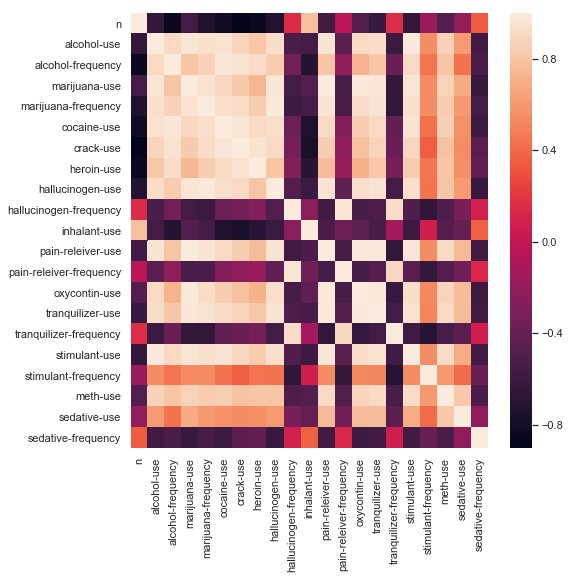

In [16]:
import seaborn as sns #plotting package built on top of matplotlib
sns.set(rc={'figure.figsize':(8, 8)})

# Use the .heatmap method to depict the relationships visually!
sns.heatmap(drugs.corr()); #semi-colon necessary here to visualize

In [25]:
# Let's look at the correlations with 'age'
# (our dependent variable) in particular.

drugs.corr()['age'].sort_values()

n                         -0.678098
tranquilizer-frequency    -0.617885
inhalant-use              -0.566919
sedative-frequency        -0.553770
hallucinogen-frequency    -0.549651
pain-releiver-frequency   -0.468873
stimulant-frequency        0.572547
sedative-use               0.602577
heroin-use                 0.846138
meth-use                   0.884185
oxycontin-use              0.896295
crack-use                  0.900670
tranquilizer-use           0.923914
hallucinogen-use           0.928213
alcohol-frequency          0.931186
pain-releiver-use          0.949312
marijuana-frequency        0.953146
marijuana-use              0.953243
cocaine-use                0.961795
stimulant-use              0.990516
alcohol-use                0.996314
age                        1.000000
Name: age, dtype: float64

In [26]:
X = drugs[['alcohol-use', 'tranquilizer-frequency', 'stimulant-use']] #CAPITAL X
y = drugs['age']

### Multicollinearity

Probably 'alcohol-use' and 'alcohol-frequency' are highly correlated _with each other_ as well as with 'age'. This can lead to the production of an _overfit_ model. We'll stick a pin in this and return to the issue of overfit models soon.

## Multiple Regression in StatsModels

In [27]:
import statsmodels.api as sm

In [ ]:
predictors

In [28]:
predictors = np.asarray(X) #set predictors as numpy array of capital X
predictors_int = sm.add_constant(predictors) #.add_constant
model = sm.OLS(y, predictors_int).fit() #statsmodels.OrddinaryLeastSquares(dependent var, array of predictors).fit()
model.summary()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     313.4
Date:                Thu, 11 Apr 2019   Prob (F-statistic):           5.56e-07
Time:                        09:36:24   Log-Likelihood:                0.56286
No. Observations:                  10   AIC:                             6.874
Df Residuals:                       6   BIC:                             8.085
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9549      0.306     39.070      0.000      11.206      12.704
x1             0.0870      0.028      3.149      0.020       0.019       0.155
x2            -0.0052      0.008     -0.620      0.558      -0.026       0.015
x3             0.4206      0.502      0.837      0.435      -0.809       1.650
==============================================================================
Omnibus:                        0.433   Durbin-Watson:                   1.119
Prob(Omnibus):                  0.805   Jarque-Bera (JB):                0.472
Skew:                          -0.009   Prob(JB):                        0.790
Kurtosis:                       1.936   Cond. No.                         277.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#Adj. R-Squared provides a slightly more accurate measure than R-Squared
#F-Statistic: kind of a global p-value for the whole model 
#aka "the probability that the correlations are appearing by chance", really small is good for model quality
#No. Observations: rows in data

#coef - 
#P>|t| - associated p-values
# [0.025  0.975]- confidence intervals
#STATSMODELS DOCS HAS EXPLANATION OF EACH SUMMARY STAT

In [223]:
predictors = np.asarray(X2)
predictors_int = sm.add_constant(X2)
model = sm.OLS(np.asarray(y), predictors_int).fit()
model.summary()

/Users/gdamico/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     258.2
Date:                Mon, 08 Apr 2019   Prob (F-statistic):           2.77e-07
Time:                        11:33:43   Log-Likelihood:                -3.1687
No. Observations:                  10   AIC:                             12.34
Df Residuals:                       7   BIC:                             13.25
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0290      0.234     51.464      0.000      11.476      12.582
meth-use         -2.0819      1.227     -1.697      0.134      -4.983       0.819
stimulant-use     2.4138      0.233     10.354      0.000       1.863       2.965
==============================================================================
Omnibus:                        1.348   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.510   Jarque-Bera (JB):                0.847
Skew:                          -0.384   Prob(JB):                        0.655
Kurtosis:                       1.799   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple Regression in Scikit-Learn

In [30]:
#WE'LL BE USING THESE A LOT IN COURSE
from sklearn.preprocessing import StandardScaler #scales data for you (subtracts mean & divides by stdDev) 
#gives us z-scores, turns it into normal bell curve
from sklearn.linear_model import LinearRegression #
from sklearn.model_selection import train_test_split #
import sklearn.metrics as metrics #bunch of ways of testing model quality (R^2, mean squared error, etc.)

In [33]:
# Let's create a StandardScaler object to scale our data for us.
ss = StandardScaler() #create StandardScalar object


# Now we'll apply it to our data by using the .fit_transform() method.

X_scaled = ss.fit_transform(X) #fit it to our data, capital X

In [35]:
np.random.seed(33) #allows reproduceability of the random split we are about to do

# Now let's SPLIT our data into TRAIN and TEST sets.
# this allows us to use a smaller subset of the data to create the model, 
# and then compare/test the model results based on the training data
# with the left out, real data to thereafter understand model quality

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y) #<-highly recommended syntax and ordering to keep track

In [36]:
# Now we can fit the LinearRegression object to our training data!

lr = LinearRegression() #make lr a LinearRegression object

lr.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
# And score it on our testing set

lr.score(X_test, Y_test) #default score is the R-squared score

0.9661820012153265

In [38]:
# We can use the .coef_ attribute to recover the results
# of the regression.

lr.coef_ #shows us the Betas that it uses in order of Beta 0 to Beta n

array([ 2.50843544, -0.14223767,  0.21067352])

## Recursive Feature Elimination

The idea behind recursive feature elimination is to build up (or down) to a small set of predictive features slowly, by eliminating the features with the lowest coefficients.

That is:
1. Start with a model with _all_ $n$ predictors;
2. find the predictor with the smallest coefficient;
3. throw that predictor out and build a model with the remining $n-1$ predictors;
4. set $n = n-1$ and repeat until $n-1$ has the value you want!

### Recursive Feature Elimination in Scikit-Learn

In [ ]:
from sklearn.feature_selection import RFE

lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=2)
select = select.fit(X = drugs.drop(columns=['age',
                                       'cocaine-frequency',
                                       'crack-frequency',
                                       'heroin-frequency',
                                       'inhalant-frequency',
                                       'oxycontin-frequency',
                                       'meth-frequency']),
                    y = drugs['age'])

select.ranking_

In [287]:
X2 = drugs[['meth-use', 'stimulant-use']]

### Sklearn Metrics

The metrics module in sklearn has a number of metrics that we can use to meaure the accuracy of our model, including the $R^2$ score, the mean absolute error and the mean squared error. Note that the default 'score' on our model object is the $R^2$ score.

In [170]:
metrics.r2_score(y_test, lr.predict(X_test))

0.9726930605104313

In [171]:
metrics.mean_absolute_error(y_test, lr.predict(X_test))

0.24770878321322107

In [172]:
metrics.mean_squared_error(y_test, lr.predict(X_test))

0.11529596673373455